In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real_Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


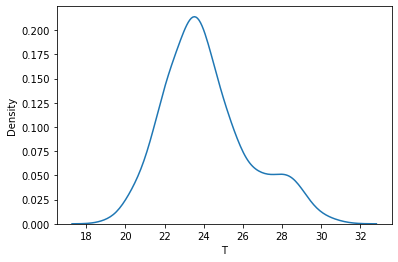

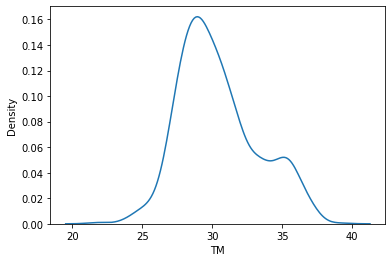

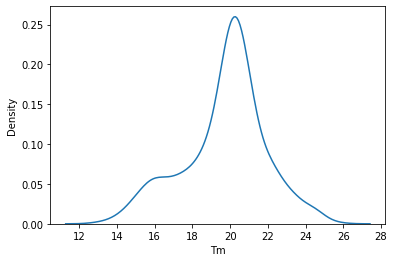

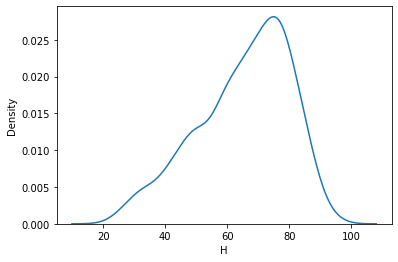

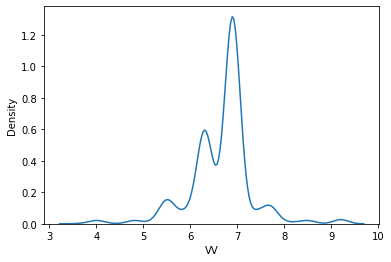

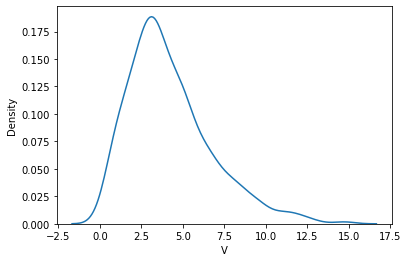

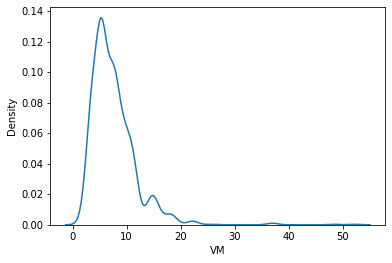

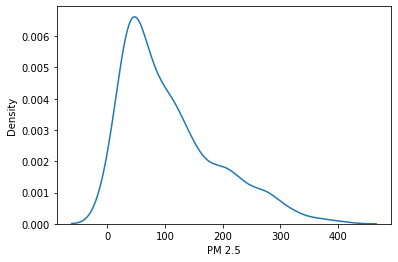

In [4]:
for col in df.columns:
    sns.kdeplot(df[col])
    plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_sc = sc_X.fit_transform(df.iloc[:,:-1])
y_sc = sc_y.fit_transform(np.array(df.iloc[:,-1]).reshape(-1, 1))

In [7]:
df.isnull().any().any()

False

In [8]:
df.shape

(1104, 8)

In [9]:
X_sc.shape,y_sc.shape

((1104, 7), (1104, 1))

In [10]:
df_sc = np.concatenate((X_sc,y_sc),axis=1)
df_sc.shape

(1104, 8)

In [11]:
df_sc = pd.DataFrame(data=df_sc,columns=df.columns)
df_sc.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,0.365854,0.494318,0.472868,0.500000,0.472727,0.280822,0.070,0.704069
1,0.284553,0.494318,0.310078,0.473684,0.581818,0.212329,0.114,0.543191
2,0.414634,0.579545,0.310078,0.394737,0.581818,0.178082,0.070,0.450402
3,0.317073,0.488636,0.364341,0.447368,0.727273,0.239726,0.114,0.380810
4,0.341463,0.511364,0.348837,0.328947,0.581818,0.212329,0.070,0.551813


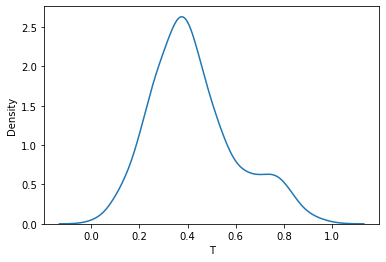

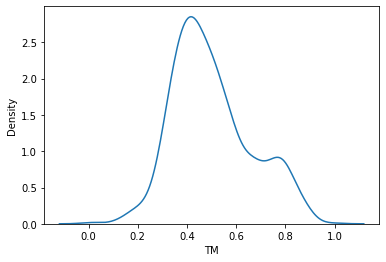

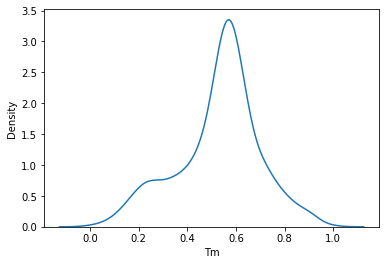

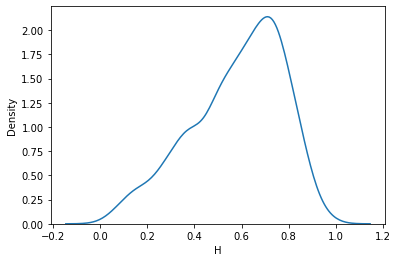

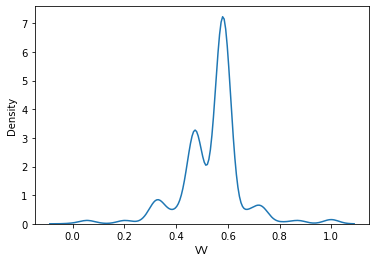

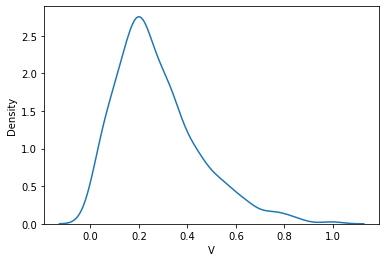

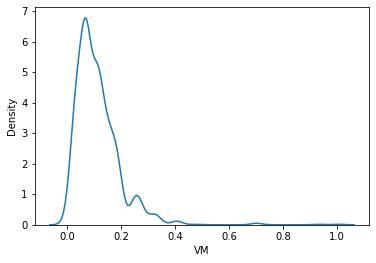

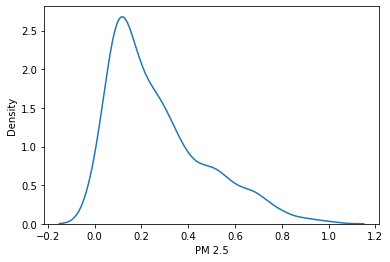

In [12]:
for col in df_sc.columns:
    sns.kdeplot(df_sc[col])
    plt.show()

## Splitting DataSet

In [13]:
training_size = int(len(df_sc)*0.65)
test_size = len(df_sc)-training_size
train_data,test_data = df_sc[:training_size],df_sc[training_size:]

In [14]:
train_data

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,0.365854,0.494318,0.472868,0.500000,0.472727,0.280822,0.070,0.704069
1,0.284553,0.494318,0.310078,0.473684,0.581818,0.212329,0.114,0.543191
2,0.414634,0.579545,0.310078,0.394737,0.581818,0.178082,0.070,0.450402
3,0.317073,0.488636,0.364341,0.447368,0.727273,0.239726,0.114,0.380810
4,0.341463,0.511364,0.348837,0.328947,0.581818,0.212329,0.070,0.551813
...,...,...,...,...,...,...,...,...
712,0.292683,0.494318,0.372093,0.368421,0.581818,0.178082,0.114,0.581788
713,0.422764,0.528409,0.581395,0.618421,0.327273,0.280822,0.070,0.547693
714,0.463415,0.482955,0.573643,0.526316,0.581818,0.164384,0.114,0.520499
715,0.439024,0.500000,0.519380,0.578947,0.581818,0.239726,0.114,0.621034


In [15]:
test_data

,T,TM,Tm,H,VV,V,VM,PM 2.5
717,0.325203,0.505682,0.403101,0.342105,0.581818,0.226027,0.070,0.620210
718,0.325203,0.534091,0.286822,0.250000,0.727273,0.178082,0.032,0.679543
719,0.365854,0.562500,0.232558,0.157895,0.672727,0.136986,0.070,0.395550
720,0.300813,0.562500,0.162791,0.236842,0.581818,0.047945,0.032,0.538731
721,0.333333,0.619318,0.100775,0.236842,0.472727,0.075342,0.032,0.455398
...,...,...,...,...,...,...,...,...
1099,0.268293,0.346591,0.372093,0.552632,0.581818,0.178082,0.114,0.464874
1100,0.308943,0.386364,0.403101,0.578947,0.472727,0.253425,0.070,0.766996
1101,0.365854,0.426136,0.426357,0.539474,0.418182,0.376712,0.150,0.505253
1102,0.398374,0.488636,0.372093,0.460526,0.327273,0.404110,0.150,0.551916


In [16]:
def create_timeseries_dataset(dataset,time_step=1):
    x,y = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        #print(dataset)
        x.append(a)
        y.append(dataset[i+time_step,-1])
    return np.array(x),np.array(y)

In [17]:
time_step = 50
X_train,y_train = create_timeseries_dataset(train_data.values,time_step=time_step)

In [18]:
X_test,y_test = create_timeseries_dataset(test_data.values,time_step=time_step)

In [19]:
X_train.shape,X_test.shape

((666, 50, 8), (336, 50, 8))

In [20]:
y_train.shape,y_test.shape

((666,), (336,))

In [21]:
def flatten_timeseries_data(dataset):
    new_data = []
    for i in range(len(dataset)):
        x = dataset[i].flatten()
        new_data.append(x)
    new_data = np.array(new_data)
    return new_data

In [22]:
X_train = flatten_timeseries_data(X_train)
X_test = flatten_timeseries_data(X_test)

In [23]:
X_train.shape,X_test.shape

((666, 400), (336, 400))

In [24]:
## Reshape input to be [samples,time_steps,features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
X_train.shape,X_test.shape

((666, 400, 1), (336, 400, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [27]:
## Creating stacked LSTM model

model = Sequential()
model.add(LSTM(80,return_sequences=True,input_shape=(400,1)))
model.add(LSTM(80,return_sequences=True))
model.add(LSTM(80))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 400, 80)           26240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 400, 80)           51520     
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 129,361
Trainable params: 129,361
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 29s 2s/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 2/100
11/11 [==============================] - 21s 2s/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 3/100
11/11 [==============================] - 22s 2s/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 4/100
11/11 [==============================] - 22s 2s/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 5/100
11/11 [==============================] - 22s 2s/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 6/100
11/11 [==============================] - 22s 2s/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 7/100
11/11 [==============================] - 22s 2s/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 8/100
11/11 [==============================] - 23s 2s/step - loss: 0.0400 - m

11/11 [==============================] - 34s 3s/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 64/100
11/11 [==============================] - 35s 3s/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 65/100
11/11 [==============================] - 35s 3s/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 66/100
11/11 [==============================] - 34s 3s/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 67/100
11/11 [==============================] - 35s 3s/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 68/100
11/11 [==============================] - 35s 3s/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 69/100
11/11 [==============================] - 38s 3s/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 70/100
11/11 [==============================] - 35s 3s/step - loss: 0.0265 - mse: 0

In [30]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
train_predict = sc_y.inverse_transform(train_predict)
test_predict = sc_y.inverse_transform(test_predict)

y_train = sc_y.inverse_transform(y_train.reshape(-1, 1))
y_test = sc_y.inverse_transform(y_test.reshape(-1, 1))

In [33]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('RMSE (train):',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE (train):',mean_absolute_error(y_train,train_predict))

RMSE (train): 50.048463129235905
MAE (train): 37.15376520223685


In [34]:
print('RMSE (train):',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE (train):',mean_absolute_error(y_test,test_predict))

RMSE (train): 54.11474181585718
MAE (train): 39.28220263738481


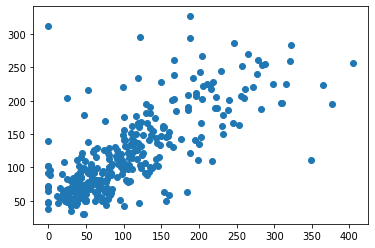

In [35]:
plt.scatter(y_test,test_predict)

In [41]:
model.save(filepath='Models/lstm_regression.h5')